In [36]:
import processing.vocabulary_stats as vs
import warnings
import yaml
from utils.utils import fetch_import_module
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000) 
import seaborn as sns
#sns.set_style("whitegrid", {'axes.grid' : False, 'axes.linewidth':0})
sns.set_style("dark", {'axes.grid' : True, 'axes.linewidth':1})

# 2. Semantic Perspective


## Data loading

In [ ]:
config = yaml.safe_load(open("config.yaml"))

In [ ]:
dataset_names = config['datasets']
data_sets_text, exclude = [], []
for dset in dataset_names:
    dset_module = fetch_import_module(dset)
    data_sets_text.append(dset_module.get_data())
    exclude.append(set(config['non-hate-label'][dset]))

## a) LSI-based intra-dataset class similarity
This method takes some time....

/home/ubuntu/cdng/dataset-evaluation/processing/vocabulary_stats.py:291: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax.append(fig2.add_subplot(spec2[k, l]))


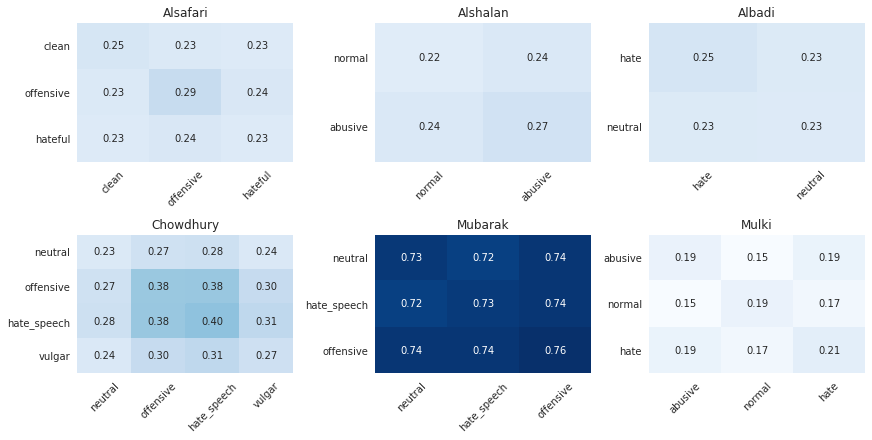

In [3]:
vs.plotIntraDatasetSimilarityMultiple("",dataset_names,data_sets_text,rows=2,cols=3,width=12,height=6)

## b) Word embedding based intra- and inter-dataset class similarity

21


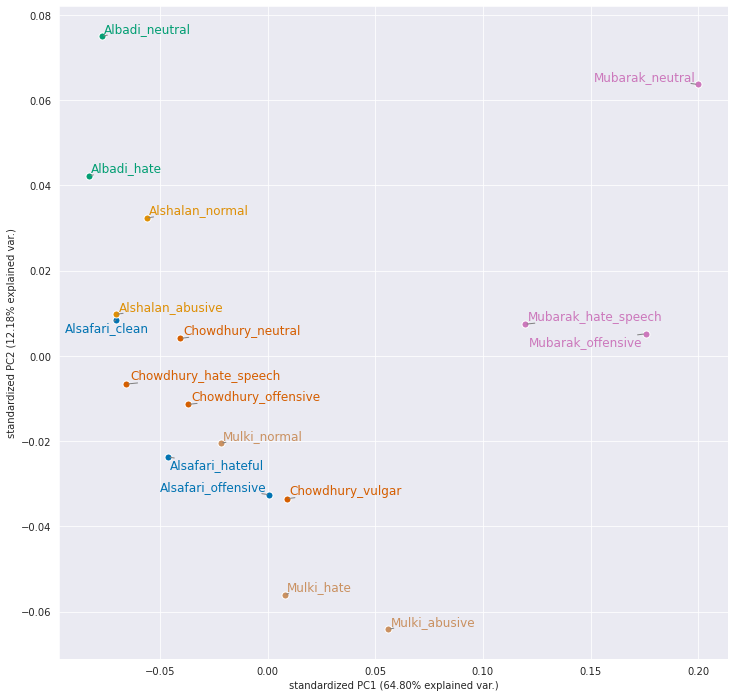

In [3]:
embedding_path = '../embeddings/cc.ar.300.bin'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    vs.getInterClassSimilarityMultiple(data_sets_text,dataset_names,embedding_path)

## c) TOP-10-Words of abusive classes with highest PMI 

In [5]:
df = vs.getTopWordOfClasses(data_sets_text, dataset_names, exclude, n=10, language='arabic')
df

,Alsafari - hateful,Alsafari - offensive,Alshalan - abusive,Albadi - hate,Chowdhury - offensive,Chowdhury - hate_speech,Chowdhury - vulgar,Mubarak - offensive,Mubarak - hate_speech,Mulki - hate,Mulki - abusive
0,الله,الله,الله,الله,الله,الله,الله,الله,الله,كلب,كول
1,شعب,الرجال,السعودية,اليهود,قناة,قطر,فيه,ابن,ابن,كلاب,هوا
2,العرب,منك,نيزك,الشيعة,والله,العرب,زق,والله,ابو,الله,باسيل
3,الذكور,انك,النسويات,الاسلام,الجزيرة,ايران,واحد,كلب,كلب,لبنان,جبران
4,والله,النساء,تركيا,اهل,مصر,السعودية,اساس,دي,الاهلي,باسيل,كلب
5,الشيعة,والله,والله,المسلمين,الخنزيرة,قناة,بن,الكلب,والله,جبران,الله
6,البنات,وجهك,مثل,السنة,قطر,الاخوان,سلمان,ولاد,عبيد,متل,عم
7,اليهود,العرب,هذه,ايران,العالم,والله,قطر,ايه,ال,قطر,حمار
8,الحريم,كلب,المجتمع,الالحاد,العرب,المسلمين,محمد,ابو,الاتحاد,انتو,خراس
9,الشوام,مثل,قطع,الملحدين,هذه,العربية,ابن,منك,عبد,حزب,روح


In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9
Alsafari - hateful,الله,شعب,العرب,الذكور,والله,الشيعة,البنات,اليهود,الحريم,الشوام
Alsafari - offensive,الله,الرجال,منك,انك,النساء,والله,وجهك,العرب,كلب,مثل
Alshalan - abusive,الله,السعودية,نيزك,النسويات,تركيا,والله,مثل,هذه,المجتمع,قطع
Albadi - hate,الله,اليهود,الشيعة,الاسلام,اهل,المسلمين,السنة,ايران,الالحاد,الملحدين
Chowdhury - offensive,الله,قناة,والله,الجزيرة,مصر,الخنزيرة,قطر,العالم,العرب,هذه
Chowdhury - hate_speech,الله,قطر,العرب,ايران,السعودية,قناة,الاخوان,والله,المسلمين,العربية
Chowdhury - vulgar,الله,فيه,زق,واحد,اساس,بن,سلمان,قطر,محمد,ابن
Mubarak - offensive,الله,ابن,والله,كلب,دي,الكلب,ولاد,ايه,ابو,منك
Mubarak - hate_speech,الله,ابن,ابو,كلب,الاهلي,والله,عبيد,ال,الاتحاد,عبد
Mulki - hate,كلب,كلاب,الله,لبنان,باسيل,جبران,متل,قطر,انتو,حزب


In [37]:
df2 = df.T
df2['Words with highest PMI'] = "\<"+df2[0] + ", " + df2[1] + ", " + df2[2] + ", " + df2[3] + ", " + df2[4] + ", " + df2[5] + ", " + df2[6] + ", " + df2[7] + ", " + df2[8] + ", " + df2[9] + ">"
df3 = df2.copy()
df3 = df3.drop([0,1,2,3,4,5,6,7,8,9], axis = 1) 
df3['Translation'] = 'ad'

In [38]:
df3

,Words with highest PMI,Translation
Alsafari - hateful,"\<الله, شعب, العرب, الذكور, والله, الشيعة, البنات, اليهود, الحريم, الشوام>",ad
Alsafari - offensive,"\<الله, الرجال, منك, انك, النساء, والله, وجهك, العرب, كلب, مثل>",ad
Alshalan - abusive,"\<الله, السعودية, نيزك, النسويات, تركيا, والله, مثل, هذه, المجتمع, قطع>",ad
Albadi - hate,"\<الله, اليهود, الشيعة, الاسلام, اهل, المسلمين, السنة, ايران, الالحاد, الملحدين>",ad
Chowdhury - offensive,"\<الله, قناة, والله, الجزيرة, مصر, الخنزيرة, قطر, العالم, العرب, هذه>",ad
Chowdhury - hate_speech,"\<الله, قطر, العرب, ايران, السعودية, قناة, الاخوان, والله, المسلمين, العربية>",ad
Chowdhury - vulgar,"\<الله, فيه, زق, واحد, اساس, بن, سلمان, قطر, محمد, ابن>",ad
Mubarak - offensive,"\<الله, ابن, والله, كلب, دي, الكلب, ولاد, ايه, ابو, منك>",ad
Mubarak - hate_speech,"\<الله, ابن, ابو, كلب, الاهلي, والله, عبيد, ال, الاتحاد, عبد>",ad
Mulki - hate,"\<كلب, كلاب, الله, لبنان, باسيل, جبران, متل, قطر, انتو, حزب>",ad


In [39]:
print(df3.to_latex())

\begin{tabular}{lll}
\toprule
{} &                                                            Words with highest PMI & Translation \\
\midrule
Alsafari - hateful      &        \textbackslash <الله, شعب, العرب, الذكور, والله, الشيعة, البنات, اليهود, الحريم, الشوام> &          ad \\
Alsafari - offensive    &                   \textbackslash <الله, الرجال, منك, انك, النساء, والله, وجهك, العرب, كلب, مثل> &          ad \\
Alshalan - abusive      &           \textbackslash <الله, السعودية, نيزك, النسويات, تركيا, والله, مثل, هذه, المجتمع, قطع> &          ad \\
Albadi - hate           &  \textbackslash <الله, اليهود, الشيعة, الاسلام, اهل, المسلمين, السنة, ايران, الالحاد, الملحدين> &          ad \\
Chowdhury - offensive   &             \textbackslash <الله, قناة, والله, الجزيرة, مصر, الخنزيرة, قطر, العالم, العرب, هذه> &          ad \\
Chowdhury - hate\_speech &     \textbackslash <الله, قطر, العرب, ايران, السعودية, قناة, الاخوان, والله, المسلمين, العربية> &          ad \\
Chowdhury - vulgar    